# __pandas__

In [136]:
import pandas as pd
from urllib.request import urlretrieve

#### __Some basic functionalities__

In [137]:

covid_df=pd.read_csv('italy-covid-daywise.csv')# to retrive data from a csv file

In [138]:
type(covid_df)

pandas.core.frame.DataFrame

In [139]:
covid_df

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN
...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0
245,2020-09-01,996.0,6.0,54395.0
246,2020-09-02,975.0,8.0,NaN


In [140]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        248 non-null    object 
 1   new_cases   248 non-null    float64
 2   new_deaths  248 non-null    float64
 3   new_tests   135 non-null    float64
dtypes: float64(3), object(1)
memory usage: 7.9+ KB


In [141]:
covid_df.describe()

,new_cases,new_deaths,new_tests
count,248.000000,248.000000,135.000000
mean,1094.818548,143.133065,31699.674074
std,1554.508002,227.105538,11622.209757
min,-148.000000,-31.000000,7841.000000
25%,123.000000,3.000000,25259.000000
50%,342.000000,17.000000,29545.000000
75%,1371.750000,175.250000,37711.000000
max,6557.000000,971.000000,95273.000000


In [142]:
covid_df.columns # list of columns

Index(['date', 'new_cases', 'new_deaths', 'new_tests'], dtype='object')

In [143]:
covid_df.shape

(248, 4)

Indexing

In [144]:
covid_df['new_cases']

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
        ...  
243    1444.0
244    1365.0
245     996.0
246     975.0
247    1326.0
Name: new_cases, Length: 248, dtype: float64

In [145]:
type(covid_df['new_cases'])

pandas.core.series.Series

In [146]:
covid_df['new_cases'][100] # indexing in within the columns

3836.0

In [147]:
"""To do both in one go we have .at()"""
covid_df.at[100,'new_cases']

3836.0

In [148]:
covid_df.new_cases #in place of covid_df['newcases']

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
        ...  
243    1444.0
244    1365.0
245     996.0
246     975.0
247    1326.0
Name: new_cases, Length: 248, dtype: float64

In [149]:
"""But the point to the same data so if you change any one of the
it will make that change to both of them"""
covid_df[['new_cases','date']] #to get sub-table of the table

,new_cases,date
0,0.0,2019-12-31
1,0.0,2020-01-01
2,0.0,2020-01-02
3,0.0,2020-01-03
4,0.0,2020-01-04
...,...,...
243,1444.0,2020-08-30
244,1365.0,2020-08-31
245,996.0,2020-09-01
246,975.0,2020-09-02


In [150]:
Covid_copy=covid_df.copy() #to copy it

In [151]:
#to access the row we uses
covid_df.loc[100]

date          2020-04-09
new_cases         3836.0
new_deaths         540.0
new_tests            NaN
Name: 100, dtype: object

In [152]:
# to get first n row we use
covid_df.head(5)

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN


In [153]:
# and for last we uses
covid_df.tail(5)

,date,new_cases,new_deaths,new_tests
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0
245,2020-09-01,996.0,6.0,54395.0
246,2020-09-02,975.0,8.0,NaN
247,2020-09-03,1326.0,6.0,NaN


In [154]:
#To check the first valid index of a column(end of NaN)
covid_df.new_tests.first_valid_index()

111

In [155]:
# to get a series of row
covid_df.loc[109:113]

,date,new_cases,new_deaths,new_tests
109,2020-04-18,3493.0,575.0,NaN
110,2020-04-19,3491.0,480.0,NaN
111,2020-04-20,3047.0,433.0,7841.0
112,2020-04-21,2256.0,454.0,28095.0
113,2020-04-22,2729.0,534.0,44248.0


In [156]:
# to get a no of row randomly
covid_df.sample(8)

,date,new_cases,new_deaths,new_tests
18,2020-01-18,0.0,0.0,NaN
140,2020-05-19,451.0,99.0,40226.0
134,2020-05-13,1402.0,172.0,37049.0
240,2020-08-27,1366.0,13.0,57640.0
227,2020-08-14,522.0,6.0,24868.0
56,2020-02-25,97.0,4.0,NaN
80,2020-03-20,5322.0,429.0,NaN
42,2020-02-11,0.0,0.0,NaN


#### __Analyzing Data from data frames__

In [157]:
total_cases =covid_df.new_cases.sum() #NaN will be ignored
total_cases

271515.0

#### __Querying and sorting row__

In [158]:
high_new_cases = covid_df.new_cases > 1000
high_new_cases

0      False
1      False
2      False
3      False
4      False
       ...  
243     True
244     True
245    False
246    False
247     True
Name: new_cases, Length: 248, dtype: bool

In [159]:
covid_df[high_new_cases] #the rows with true remains

,date,new_cases,new_deaths,new_tests
68,2020-03-08,1247.0,36.0,NaN
69,2020-03-09,1492.0,133.0,NaN
70,2020-03-10,1797.0,98.0,NaN
72,2020-03-12,2313.0,196.0,NaN
73,2020-03-13,2651.0,189.0,NaN
...,...,...,...,...
241,2020-08-28,1409.0,5.0,65135.0
242,2020-08-29,1460.0,9.0,64294.0
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0


In [160]:
"""OR we can use it directly do it using"""
#covid_df[covid_df.new_cases>10]

'OR we can use it directly do it using'

In [161]:
"""to show all the rows or a limited no of all row"""
from IPython.display import display
with pd.option_context('display.max_rows',100):
    display(covid_df[covid_df.new_cases>1000])

,date,new_cases,new_deaths,new_tests
68,2020-03-08,1247.0,36.0,NaN
69,2020-03-09,1492.0,133.0,NaN
70,2020-03-10,1797.0,98.0,NaN
72,2020-03-12,2313.0,196.0,NaN
73,2020-03-13,2651.0,189.0,NaN
74,2020-03-14,2547.0,252.0,NaN
75,2020-03-15,3497.0,173.0,NaN
76,2020-03-16,2823.0,370.0,NaN
77,2020-03-17,4000.0,347.0,NaN
78,2020-03-18,3526.0,347.0,NaN


In [162]:
#to add new coloumn
covid_df['death_rate']=covid_df.new_deaths/covid_df.new_cases
covid_df

,date,new_cases,new_deaths,new_tests,death_rate
0,2019-12-31,0.0,0.0,NaN,NaN
1,2020-01-01,0.0,0.0,NaN,NaN
2,2020-01-02,0.0,0.0,NaN,NaN
3,2020-01-03,0.0,0.0,NaN,NaN
4,2020-01-04,0.0,0.0,NaN,NaN
...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,0.000693
244,2020-08-31,1365.0,4.0,42583.0,0.002930
245,2020-09-01,996.0,6.0,54395.0,0.006024
246,2020-09-02,975.0,8.0,NaN,0.008205


In [163]:
#to remove
covid_df.drop(columns=['death_rate'],inplace=True)
covid_df

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN
...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0
245,2020-09-01,996.0,6.0,54395.0
246,2020-09-02,975.0,8.0,NaN


In [164]:
#covid_df.sort_values('new_cases',ascending=False).head(10)
covid_df.sort_values('new_cases').head(10)

,date,new_cases,new_deaths,new_tests
172,2020-06-20,-148.0,47.0,29875.0
0,2019-12-31,0.0,0.0,NaN
29,2020-01-29,0.0,0.0,NaN
30,2020-01-30,0.0,0.0,NaN
32,2020-02-01,0.0,0.0,NaN
33,2020-02-02,0.0,0.0,NaN
34,2020-02-03,0.0,0.0,NaN
36,2020-02-05,0.0,0.0,NaN
37,2020-02-06,0.0,0.0,NaN
38,2020-02-07,0.0,0.0,NaN


In [165]:
"""172 is faulty data we should replace it with a good value"""
covid_df.at[172,'new_cases']=(covid_df.at[171,'new_cases']+covid_df.at[173,'new_cases'])/2


In [166]:
covid_df.loc[170:175]

,date,new_cases,new_deaths,new_tests
170,2020-06-18,328.0,43.0,32921.0
171,2020-06-19,331.0,66.0,28570.0
172,2020-06-20,297.5,47.0,29875.0
173,2020-06-21,264.0,49.0,24581.0
174,2020-06-22,224.0,24.0,16152.0
175,2020-06-23,221.0,23.0,23225.0


#### Working with dates

In [167]:
covid_df.date

0      2019-12-31
1      2020-01-01
2      2020-01-02
3      2020-01-03
4      2020-01-04
          ...    
243    2020-08-30
244    2020-08-31
245    2020-09-01
246    2020-09-02
247    2020-09-03
Name: date, Length: 248, dtype: object

In [168]:
"""the date is an object we should type-cast it to pandas-date"""
covid_df['date']=pd.to_datetime(covid_df.date)

In [169]:
covid_df['date']

0     2019-12-31
1     2020-01-01
2     2020-01-02
3     2020-01-03
4     2020-01-04
         ...    
243   2020-08-30
244   2020-08-31
245   2020-09-01
246   2020-09-02
247   2020-09-03
Name: date, Length: 248, dtype: datetime64[ns]

In [170]:
covid_df['day']=pd.DatetimeIndex(covid_df.date).day
covid_df['month']=pd.DatetimeIndex(covid_df.date).month
covid_df['year']=pd.DatetimeIndex(covid_df.date).year
covid_df['weekday']=pd.DatetimeIndex(covid_df.date).weekday
covid_df

,date,new_cases,new_deaths,new_tests,day,month,year,weekday
0,2019-12-31,0.0,0.0,NaN,31,12,2019,1
1,2020-01-01,0.0,0.0,NaN,1,1,2020,2
2,2020-01-02,0.0,0.0,NaN,2,1,2020,3
3,2020-01-03,0.0,0.0,NaN,3,1,2020,4
4,2020-01-04,0.0,0.0,NaN,4,1,2020,5
...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,30,8,2020,6
244,2020-08-31,1365.0,4.0,42583.0,31,8,2020,0
245,2020-09-01,996.0,6.0,54395.0,1,9,2020,1
246,2020-09-02,975.0,8.0,NaN,2,9,2020,2


In [171]:
covid_df[covid_df.month==5]

,date,new_cases,new_deaths,new_tests,day,month,year,weekday
122,2020-05-01,1872.0,285.0,43732.0,1,5,2020,4
123,2020-05-02,1965.0,269.0,31231.0,2,5,2020,5
124,2020-05-03,1900.0,474.0,27047.0,3,5,2020,6
125,2020-05-04,1389.0,174.0,22999.0,4,5,2020,0
126,2020-05-05,1221.0,195.0,32211.0,5,5,2020,1
127,2020-05-06,1075.0,236.0,37771.0,6,5,2020,2
128,2020-05-07,1444.0,369.0,13665.0,7,5,2020,3
129,2020-05-08,1401.0,274.0,45428.0,8,5,2020,4
130,2020-05-09,1327.0,243.0,36091.0,9,5,2020,5
131,2020-05-10,1083.0,194.0,31384.0,10,5,2020,6


#### __Grouping and aggregation__


In [172]:
covid_df.groupby('month')

In [173]:
covid_df.groupby('month')[['new_cases','new_deaths']]

In [174]:
monthly_group=covid_df.groupby('month')[['new_cases','new_deaths']].sum()
monthly_group

,new_cases,new_deaths
month,,
1,3.0,0.0
2,885.0,21.0
3,100851.0,11570.0
4,101852.0,16091.0
5,29073.0,5658.0
6,8217.5,1404.0
7,6722.0,388.0
8,21060.0,345.0
9,3297.0,20.0


In [175]:
weekly_mean=covid_df.groupby('weekday')[['new_cases','new_deaths']].mean()
weekly_mean

,new_cases,new_deaths
weekday,,
0,1109.142857,124.800000
1,918.638889,129.944444
2,927.305556,144.750000
3,1095.666667,141.472222
4,1189.714286,144.885714
5,1198.528571,157.000000
6,1247.257143,159.457143


In [176]:
#cumsum(cummulative sum): sum of all previous value upto that row
covid_df['total_case']=covid_df.new_cases.cumsum()
covid_df

,date,new_cases,new_deaths,new_tests,day,month,year,weekday,total_case
0,2019-12-31,0.0,0.0,NaN,31,12,2019,1,0.0
1,2020-01-01,0.0,0.0,NaN,1,1,2020,2,0.0
2,2020-01-02,0.0,0.0,NaN,2,1,2020,3,0.0
3,2020-01-03,0.0,0.0,NaN,3,1,2020,4,0.0
4,2020-01-04,0.0,0.0,NaN,4,1,2020,5,0.0
...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,30,8,2020,6,267298.5
244,2020-08-31,1365.0,4.0,42583.0,31,8,2020,0,268663.5
245,2020-09-01,996.0,6.0,54395.0,1,9,2020,1,269659.5
246,2020-09-02,975.0,8.0,NaN,2,9,2020,2,270634.5


#### __Merging data from multiple sources__

In [ ]:
urlretrieve('https://gist.githubusercontent.com/aakashns/8684589ef4f266116cdce023377fc9c8/raw/99ce3826b2a9d1e6d0bde7e9e559fc8b6e9ac88b/locations.csv', 
            'locations.csv')

In [178]:
location_df=pd.read_csv('locations.csv')
location_df

,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
0,Afghanistan,Asia,3.892834e+07,64.83,0.500,1803.987
1,Albania,Europe,2.877800e+06,78.57,2.890,11803.431
2,Algeria,Africa,4.385104e+07,76.88,1.900,13913.839
3,Andorra,Europe,7.726500e+04,83.73,NaN,NaN
4,Angola,Africa,3.286627e+07,61.15,NaN,5819.495
...,...,...,...,...,...,...
207,Yemen,Asia,2.982597e+07,66.12,0.700,1479.147
208,Zambia,Africa,1.838396e+07,63.89,2.000,3689.251
209,Zimbabwe,Africa,1.486293e+07,61.49,1.700,1899.775
210,World,NaN,7.794799e+09,72.58,2.705,15469.207


In [179]:
covid_df['location']="Italy"

In [180]:
merged=covid_df.merge(location_df,on="location")
merged

,date,new_cases,new_deaths,new_tests,day,month,year,weekday,total_case,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
0,2019-12-31,0.0,0.0,NaN,31,12,2019,1,0.0,Italy,Europe,60461828.0,83.51,3.18,35220.084
1,2020-01-01,0.0,0.0,NaN,1,1,2020,2,0.0,Italy,Europe,60461828.0,83.51,3.18,35220.084
2,2020-01-02,0.0,0.0,NaN,2,1,2020,3,0.0,Italy,Europe,60461828.0,83.51,3.18,35220.084
3,2020-01-03,0.0,0.0,NaN,3,1,2020,4,0.0,Italy,Europe,60461828.0,83.51,3.18,35220.084
4,2020-01-04,0.0,0.0,NaN,4,1,2020,5,0.0,Italy,Europe,60461828.0,83.51,3.18,35220.084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,30,8,2020,6,267298.5,Italy,Europe,60461828.0,83.51,3.18,35220.084
244,2020-08-31,1365.0,4.0,42583.0,31,8,2020,0,268663.5,Italy,Europe,60461828.0,83.51,3.18,35220.084
245,2020-09-01,996.0,6.0,54395.0,1,9,2020,1,269659.5,Italy,Europe,60461828.0,83.51,3.18,35220.084
246,2020-09-02,975.0,8.0,NaN,2,9,2020,2,270634.5,Italy,Europe,60461828.0,83.51,3.18,35220.084


In [181]:
merged['case/million']=merged.total_case*1e6/merged.population
merged

,date,new_cases,new_deaths,new_tests,day,month,year,weekday,total_case,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita,case/million
0,2019-12-31,0.0,0.0,NaN,31,12,2019,1,0.0,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000
1,2020-01-01,0.0,0.0,NaN,1,1,2020,2,0.0,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000
2,2020-01-02,0.0,0.0,NaN,2,1,2020,3,0.0,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000
3,2020-01-03,0.0,0.0,NaN,3,1,2020,4,0.0,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000
4,2020-01-04,0.0,0.0,NaN,4,1,2020,5,0.0,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,30,8,2020,6,267298.5,Italy,Europe,60461828.0,83.51,3.18,35220.084,4420.946386
244,2020-08-31,1365.0,4.0,42583.0,31,8,2020,0,268663.5,Italy,Europe,60461828.0,83.51,3.18,35220.084,4443.522614
245,2020-09-01,996.0,6.0,54395.0,1,9,2020,1,269659.5,Italy,Europe,60461828.0,83.51,3.18,35220.084,4459.995818
246,2020-09-02,975.0,8.0,NaN,2,9,2020,2,270634.5,Italy,Europe,60461828.0,83.51,3.18,35220.084,4476.121695


In [182]:
merged.to_csv('final_analysis.csv',index=False)

In [183]:
#to use date as the index
merged.set_index('date',inplace=True)

<Axes: title={'center': 'date vs new cases and deaths'}, xlabel='date'>

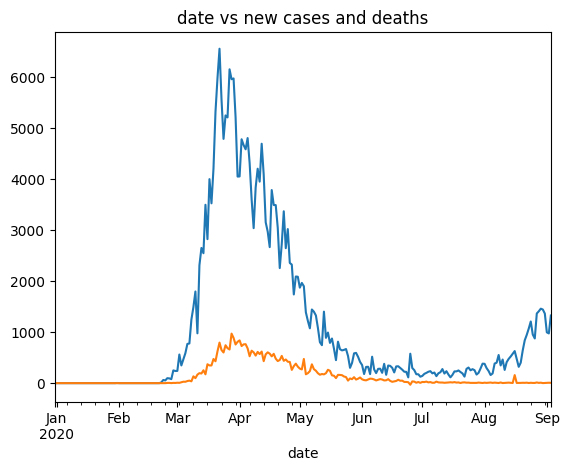

In [185]:
merged.new_cases.plot(title='date vs new cases and deaths')
merged.new_deaths.plot()

<Axes: title={'center': 'New cases each month'}, xlabel='month'>

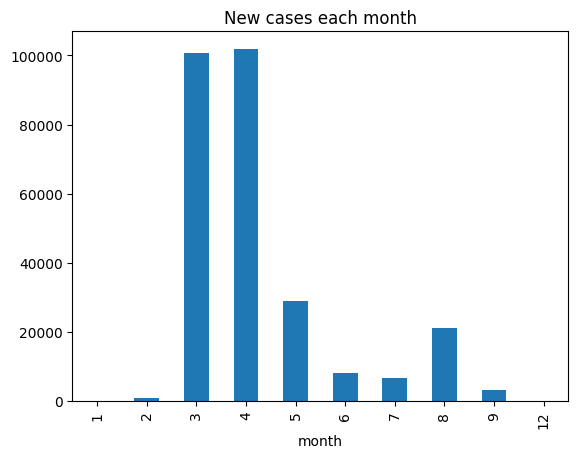

In [187]:
monthly_group.new_cases.plot(kind='bar',title='New cases each month')